Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
import pandas_profiling
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
#Running profile report on the data
df.profile_report()

In [0]:
import plotly.express as px
import matplotlib.pyplot as plt



In [0]:
df.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

In [0]:
df.shape

(49352, 34)

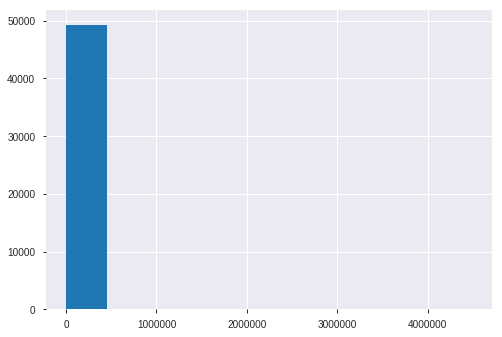

In [6]:
#Plotting the distribution of price
plt.hist(df['price']);


In [7]:
df['price'].describe()

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

In [8]:
#Checking the data for price .999 quantile and 0.001
df['price'].quantile([0.999,0.001])
#only 4 rows and that constitues less than 0.01% of data, hence removing the same from the data due to extremely high range

0.999    30000.0
0.001     1200.0
Name: price, dtype: float64

In [9]:
#checking for price greater than 30000
df.query('price > 30000')
#only 35 rows and removing the same as they are outliers in extremely high values

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
2743         4.0         4  ...                 0                    0
5250         2.5         2  ...                 0                    0
5298         4.0         4  ...                 1                    0
7336         5.0         4  ...                 0                    0
8042         0.0         0  ...                 0                    0
9590         1.0         2  ...                 0                    0
9891         4.5         5  ...                 0                    0
10581        0.0         0  ...                 0                    0
11235        6.0         5  ...                 0                    0
15305        4.5         5  ...                 0                    0
18426        4.0         4  ...                 0                    0
18735        2.0         2  ...                 0                    0
19558        1.0         2  ...                 0                    0
23385        4.0         5  ...                 0                    0
25538        1.0         0  ...                 0                    0
25685        5.0         5  ...                 0                    0
26032        4.0         4  ...                 0                    0
27477        4.0         4  ...                 0                    0
27838        1.0         3  ...                 0                    0
28987        4.0         5  ...                 0                    0
29082        3.0         3  ...                 0                    0
29665        1.0         1  ...                 0                    0
30116        5.0         4  ...                 0                    0
30618        4.0         5  ...                 0                    0
30689        1.0         1  ...                 0                    0
30768        4.0         5  ...                 0                    0
31668        4.0         4  ...                 0                    0
31797        4.0         4  ...                 0                    0
42573        7.0         5  ...                 0                    0
44832        1.0         0  ...                 0                    0
45163        4.0         4  ...                 0                    0
45674        6.0         6  ...                 0                    0
46343        3.5         3  ...                 0                    0
46792        4.0         4  ...                 0                    0
47995        3.0         3  ...                 0                    0

[35 rows x 34 columns]

In [10]:
#checking for price greater than 30000
df.query('price < 1200')
#only 49 rows and removing the same as they are outliers in extremely low values

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
1236         1.0         0  ...                 0                    0
1813         1.0         0  ...                 0                    0
2338         1.0         0  ...                 0                    0
2350         1.0         2  ...                 0                    0
4020         1.0         1  ...                 0                    0
4310         1.0         0  ...                 0                    0
5942         1.0         0  ...                 0                    0
5966         1.0         0  ...                 0                    0
6363         1.0         0  ...                 0                    0
6850         1.0         0  ...                 0                    0
7654         1.0         1  ...                 0                    0
8623         1.0         0  ...                 0                    0
9071         0.0         0  ...                 0                    0
9345         1.0         0  ...                 0                    0
9621         1.0         0  ...                 0                    0
9732         1.0         0  ...                 0                    0
10777        2.5         3  ...                 0                    0
12985        1.0         0  ...                 0                    0
13387        3.0         3  ...                 0                    0
13521        1.0         0  ...                 0                    0
13837        1.0         0  ...                 0                    0
14212        1.0         0  ...                 0                    0
14997        2.0         2  ...                 0                    0
15172        1.0         2  ...                 0                    0
18729        1.0         0  ...                 0                    0
20394        1.0         0  ...                 0                    0
21684        1.0         0  ...                 0                    0
21879        2.0         2  ...                 0                    0
23516        1.0         0  ...                 0                    0
26760        1.0         0  ...                 0                    0
27664        2.0         3  ...                 0                    1
28626        1.0         0  ...                 0                    0
29736        1.0         0  ...                 0                    0
31619        2.0         2  ...                 0                    0
32187        0.0         0  ...                 0                    0
32248        2.0         5  ...                 0                    0
35510        1.0         0  ...                 0                    1
39327        1.0         1  ...                 0                    0
41141        1.0         1  ...                 0                    0
42133        1.0         0  ...                 0                    0
42609        1.0         1  ...                 0                    0
43030        1.0         0  ...                 0                    0
43145        0.0         0  ...                 0                    0
43824        1.0         0  ...                 0                    0
44206        1.0         0  ...                 0                    0
45520        1.0         1  ...                 0                    0
46164        1.0         0  ...                 0                    0
46400        1.0         0  ...                 0                    0
47541        1.0         0  ...                 0                    0

[49 rows x 34 columns]

In [11]:
df = df.query('(price>=1200) & (price <= 30000)')
df.shape

(49268, 34)

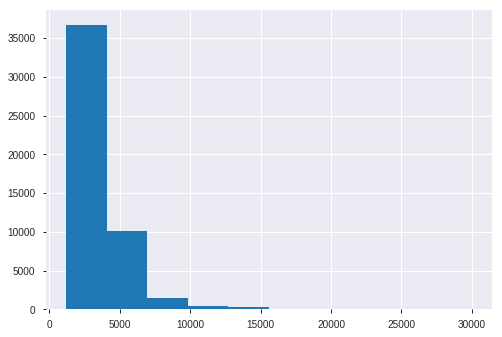

In [12]:
#Plotting the histogram again
plt.hist(df['price']);

In [13]:
df['price'].describe()
#The mean price is now 3643 compared to 3830 previously

count    49268.000000
mean      3643.849152
std       2105.418863
min       1200.000000
25%       2500.000000
50%       3150.000000
75%       4100.000000
max      30000.000000
Name: price, dtype: float64

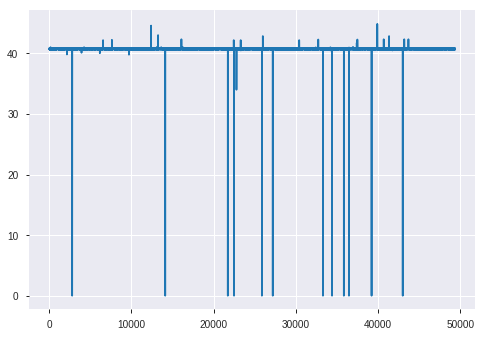

In [14]:
#plotting for latitude
plt.plot(df['latitude'])
#Some of the latitude is at zero which cannot be right, as it is New York data.

In [15]:
#checking for latitude at zero
print(df.query('latitude==0').shape)
df.query('latitude==0')
#The longtitude is also zero, has the data of latitude and longtitude not updated here.

(12, 34)


bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
2787         5.0         6  ...                 0                    0
14104        1.0         1  ...                 0                    0
21715        1.0         1  ...                 0                    0
22471        1.0         2  ...                 0                    0
25860        1.0         2  ...                 0                    0
27181        1.0         2  ...                 0                    0
33286        4.0         3  ...                 0                    0
34390        1.0         1  ...                 0                    0
35826        1.0         2  ...                 0                    0
36448        1.0         1  ...                 0                    0
39199        1.0         2  ...                 0                    0
42987        1.0         0  ...                 0                    0

[12 rows x 34 columns]

In [16]:
#checking for longtitude at zero
print(df.query('longitude==0').shape)
df.query('longitude==0')
#The longtitude is also zero, has the data of latitude and longtitude not updated here.
#Both are same data, not sure what to do about this data, if these are used as featured, they might have to be removed.

(12, 34)


bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
2787         5.0         6  ...                 0                    0
14104        1.0         1  ...                 0                    0
21715        1.0         1  ...                 0                    0
22471        1.0         2  ...                 0                    0
25860        1.0         2  ...                 0                    0
27181        1.0         2  ...                 0                    0
33286        4.0         3  ...                 0                    0
34390        1.0         1  ...                 0                    0
35826        1.0         2  ...                 0                    0
36448        1.0         1  ...                 0                    0
39199        1.0         2  ...                 0                    0
42987        1.0         0  ...                 0                    0

[12 rows x 34 columns]

In [18]:
#using bedrooms feature and plotting it against price
px.scatter(df,x='bedrooms',y='price',trendline='ols')
#The trendline doesn't justify most of the prices. Also, the price does not seem to be in linear relationship with the price


In [19]:
#plotting the price agains latitude
px.scatter(df,x='latitude',y='price')
#again there doesn't seem to be linear relationship with respect to price